# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [6]:
!pip install plotly==5.20.0


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [7]:
import kagglehub
import os


# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [8]:
# put your answer here
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [9]:
# put your answer here
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [10]:
# put your answer here
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [11]:
# put your answer here
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [12]:
# put your answer here
df = df.drop("country", axis=1)
df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [13]:
# put your answer here
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.316620,-0.907441,0.342391,0.056042,-0.429416,0.453020,-1.469565,1.635492,-0.322877
1,-0.050139,-0.254083,0.062500,0.185639,-0.001543,-0.100671,0.278261,-0.364508,-0.044811
2,0.148561,0.123412,-0.584239,-0.416813,0.151196,1.197987,0.295652,0.230216,-0.015723
3,1.851439,0.990926,-0.942935,-0.014011,-0.208794,1.902685,-1.130435,1.798561,-0.088836
4,-0.167131,0.381125,-0.078804,0.546410,0.470044,-0.441834,0.321739,-0.134293,0.592767
5,-0.089136,-0.584392,0.483696,-0.956217,0.449473,1.734899,0.234783,-0.019185,0.443396
6,-0.022284,-0.515426,-0.521739,0.070053,-0.167652,0.266219,0.017391,-0.345324,-0.113208
7,-0.269266,-0.551724,0.654891,-0.784588,1.616868,-0.473154,0.773913,-0.230216,3.713836
8,-0.278552,0.591652,1.271739,0.157618,1.709437,-0.505257,0.643478,-0.465228,3.320755
9,0.369545,0.700544,-0.119565,-0.791594,0.310620,0.940716,-0.347826,-0.235012,0.092767


In [14]:
df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.352276,0.221741,0.134698,0.125752,0.369488,0.267543,-0.221244,0.258016,0.652842
std,0.748912,0.994991,0.746423,0.847972,0.991415,1.182405,0.773319,0.726066,1.440936
min,-0.310121,-1.266461,-1.225543,-1.514329,-0.480895,-1.073826,-3.565217,-0.604317,-0.348192
25%,-0.205200,-0.406534,-0.380435,-0.458844,-0.339676,-0.400447,-0.678261,-0.294964,-0.261792
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.794800,0.593466,0.619565,0.541156,0.660324,0.599553,0.321739,0.705036,0.738208
max,3.504178,5.989111,3.146739,4.577933,5.916174,11.030201,0.843478,2.436451,7.888365


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

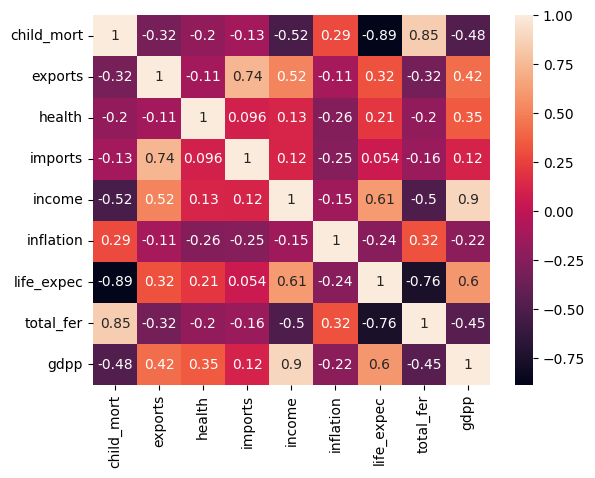

In [15]:
# put your answer here
corr = df_scaled.corr()
sns.heatmap(corr, annot=True)
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

From the heatmap above here are the features that I think strongly correlate with each other

- Child Mortality and life expectancy
- Life Expentancy and Total Fer
- GDP and Income

We should only use one of these because it just represents the same data do not use both both of the variables in clustering


In [38]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,0.352276,0.748912,-0.310121,-0.205200,0.0,0.794800,3.504178
exports,167.0,0.221741,0.994991,-1.266461,-0.406534,0.0,0.593466,5.989111
health,167.0,0.134698,0.746423,-1.225543,-0.380435,0.0,0.619565,3.146739
imports,167.0,0.125752,0.847972,-1.514329,-0.458844,0.0,0.541156,4.577933
income,167.0,0.369488,0.991415,-0.480895,-0.339676,0.0,0.660324,5.916174
inflation,167.0,0.267543,1.182405,-1.073826,-0.400447,0.0,0.599553,11.030201
life_expec,167.0,-0.221244,0.773319,-3.565217,-0.678261,0.0,0.321739,0.843478
total_fer,167.0,0.258016,0.726066,-0.604317,-0.294964,0.0,0.705036,2.436451
gdpp,167.0,0.652842,1.440936,-0.348192,-0.261792,0.0,0.738208,7.888365


In [37]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_scaled)
pca.explained_variance_ratio_


array([0.48841948, 0.16547786, 0.14891017, 0.0942477 , 0.0600765 ,
       0.01522075, 0.01207877, 0.00994172, 0.00562705])

In [45]:
import plotly.io as pio
pio.renderers.default = "colab"
import plotly.graph_objects as go

x="child_mort"
y="exports"
z="health"

correlated_features = df_scaled[[x, y, z]]

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=correlated_features[x],
    y=correlated_features[y],
    z=correlated_features[z],
    mode="markers",
    marker=dict(size=3)
))

fig.update_layout(
    title="",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z"
    ),
    height=700
)

fig.show()


In [56]:
import plotly.io as pio
pio.renderers.default = "colab"
import plotly.graph_objects as go

x = "health"
y = "gdpp"

correlated_features = df_scaled[[x, y]]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=correlated_features[x],
    y=correlated_features[y],
    mode="markers",
    marker=dict(size=9)
))

fig.update_layout(
    title="2D Scatter Plot",
    xaxis_title=x,
    yaxis_title=y,
    height=700
)

fig.show()


## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

In [60]:
X = df_scaled[[x,y]]
X.head()

,health,gdpp
0,0.342391,-0.322877
1,0.062500,-0.044811
2,-0.584239,-0.015723
3,-0.942935,-0.088836
4,-0.078804,0.592767


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [60.0, 60.0, 91.25, 91.25],
  [32.5, 32.5, 75.625, 75.625],
  [10.0, 10.0, 54.0625, 54.0625],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [150.0, 150.0, 172.5, 172.5],
  [130.0, 130.0, 161.25, 161.25],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [145.625, 145.625, 203.75, 203.75],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0,

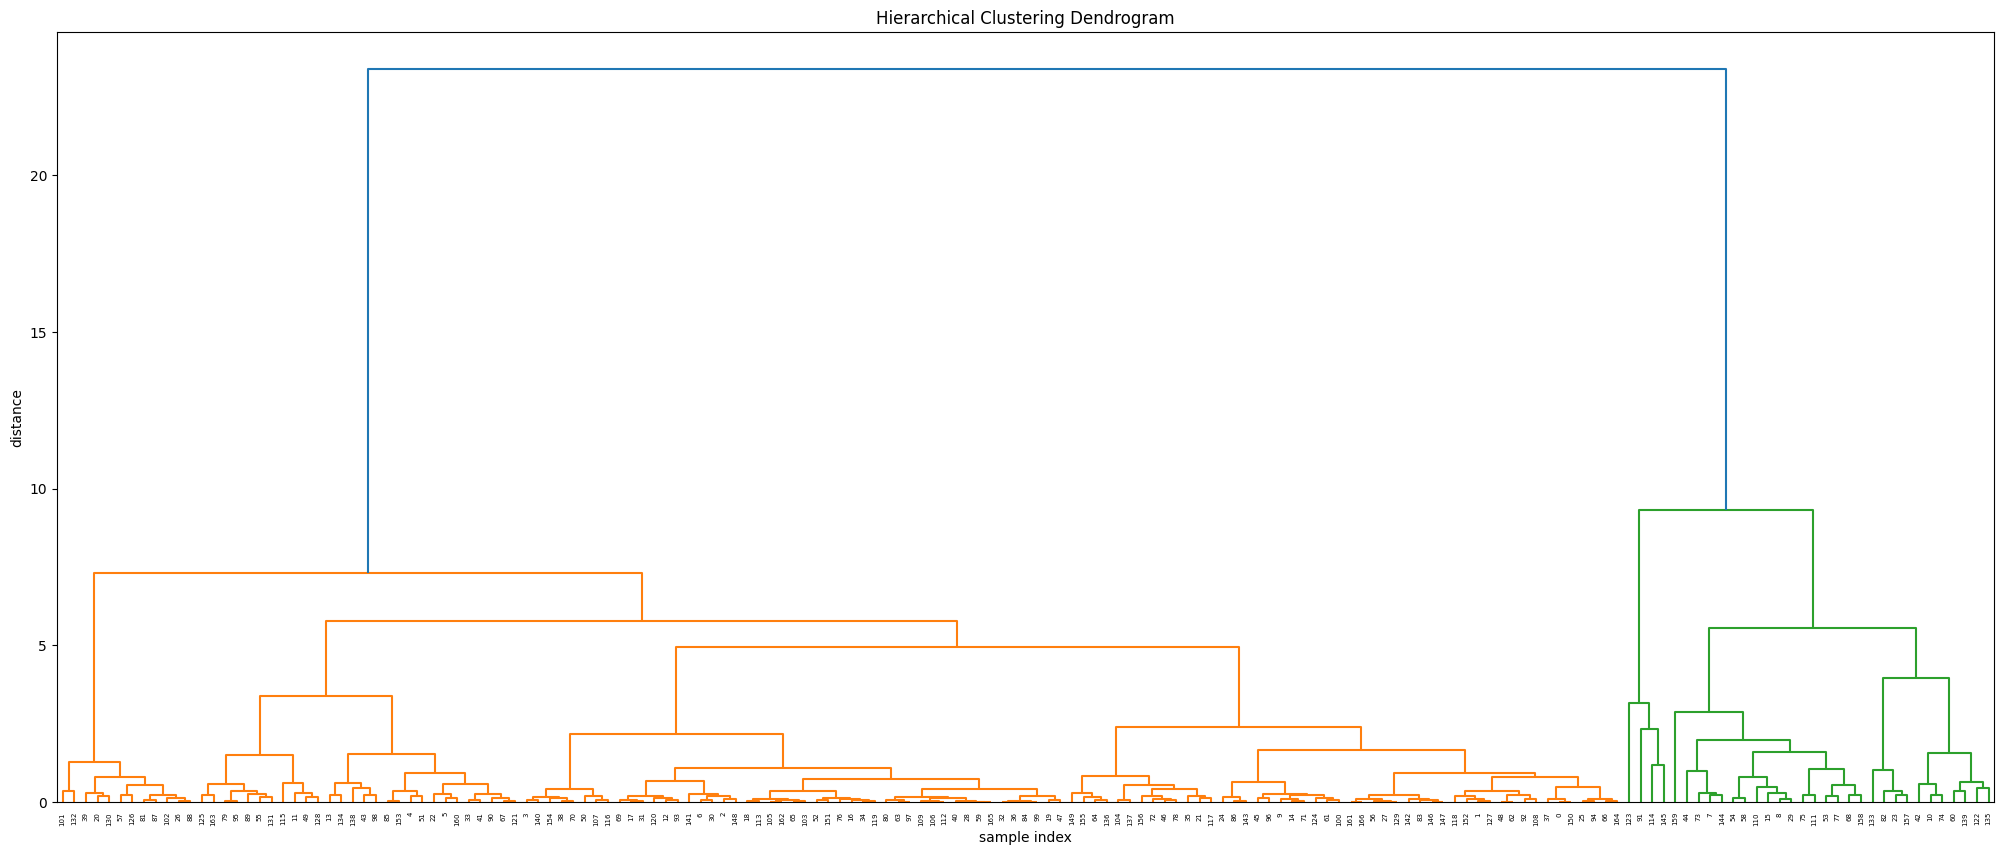

In [61]:
# put your answer here

Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)


{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [215.0, 215.0, 240.0, 240.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [227.5, 227.5, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [332.5, 332.5, 362.5, 362.5],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [395.0, 395.0, 412.5, 412.5],
  [435.0, 435.0, 445.0, 445.0],
  [403.75, 403.75, 440.0, 440.0],
  [475.0, 475.0, 485.0, 485.0],
  [495.0, 495.0, 505.0, 505.0],
  [480.0, 480.0, 500.0, 500.0],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [490.0, 490.0, 522.5, 522.5],
  [465.0, 465.0, 506.25, 506.25],
  [455.0, 455.0, 485.625, 485.625]

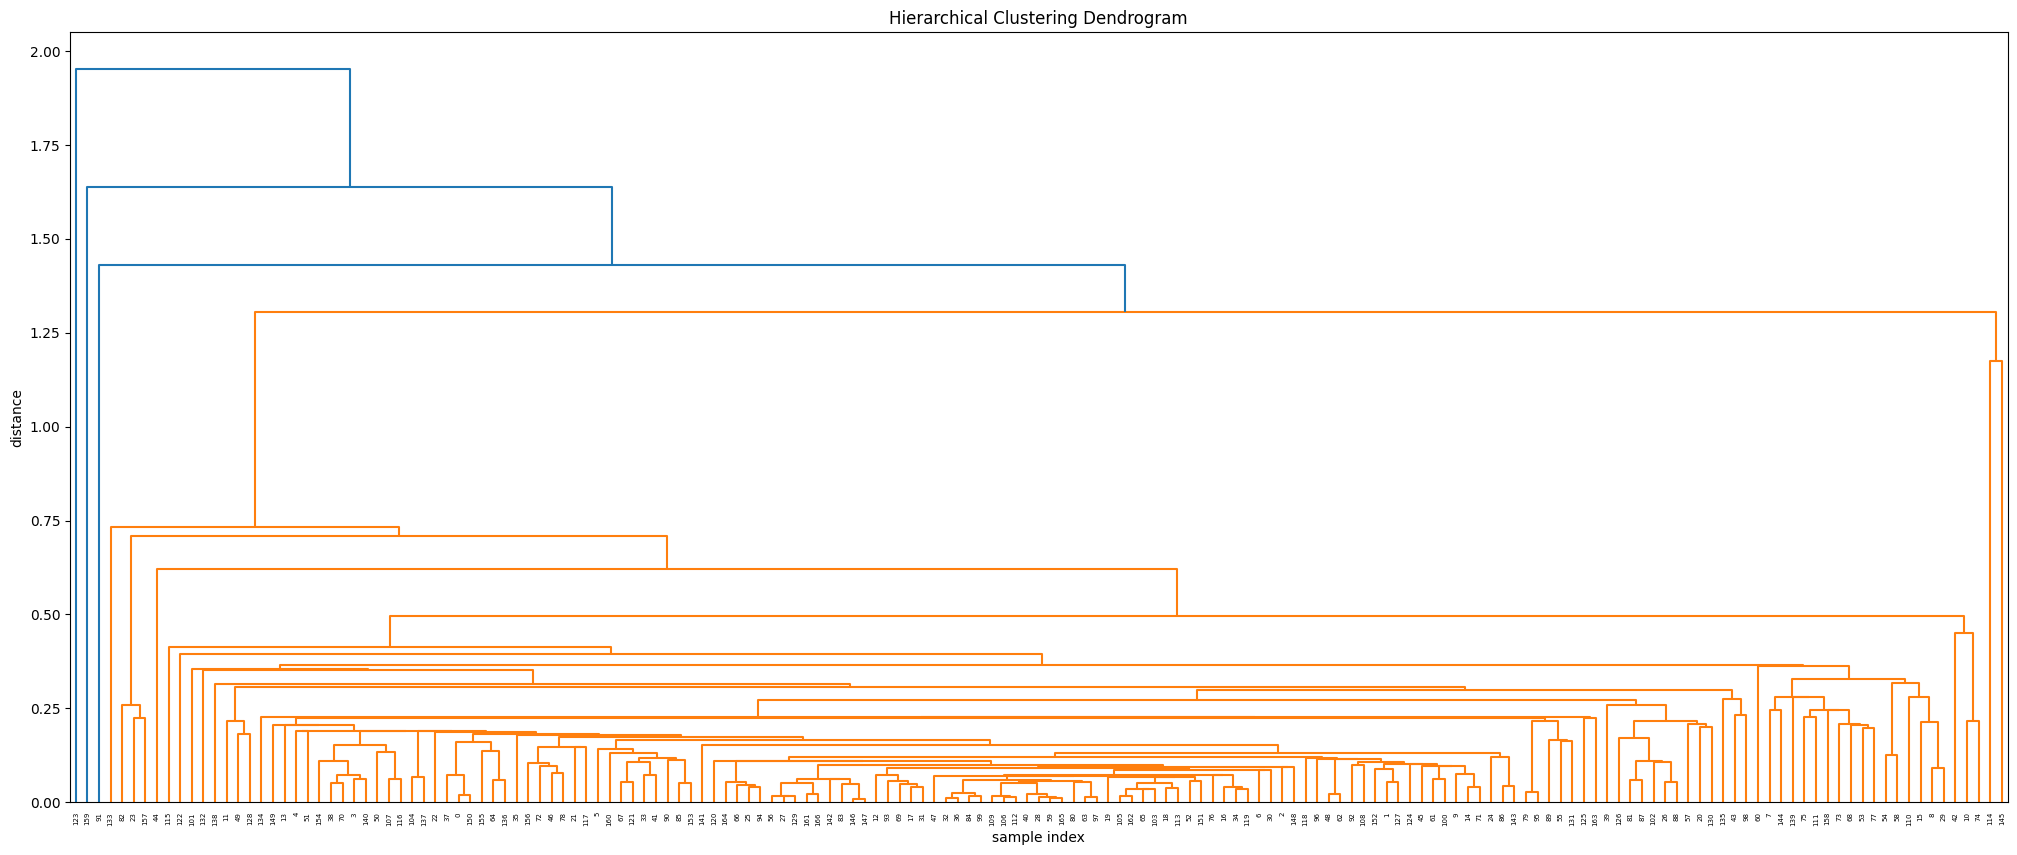

In [62]:
# put your answer here

Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [111.25, 111.25, 150.0, 150.0],
  [72.5, 72.5, 130.625, 130.625],
  [50.0, 50.0, 101.5625, 101.5625],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [267.5, 267.5, 312.5, 312.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 3

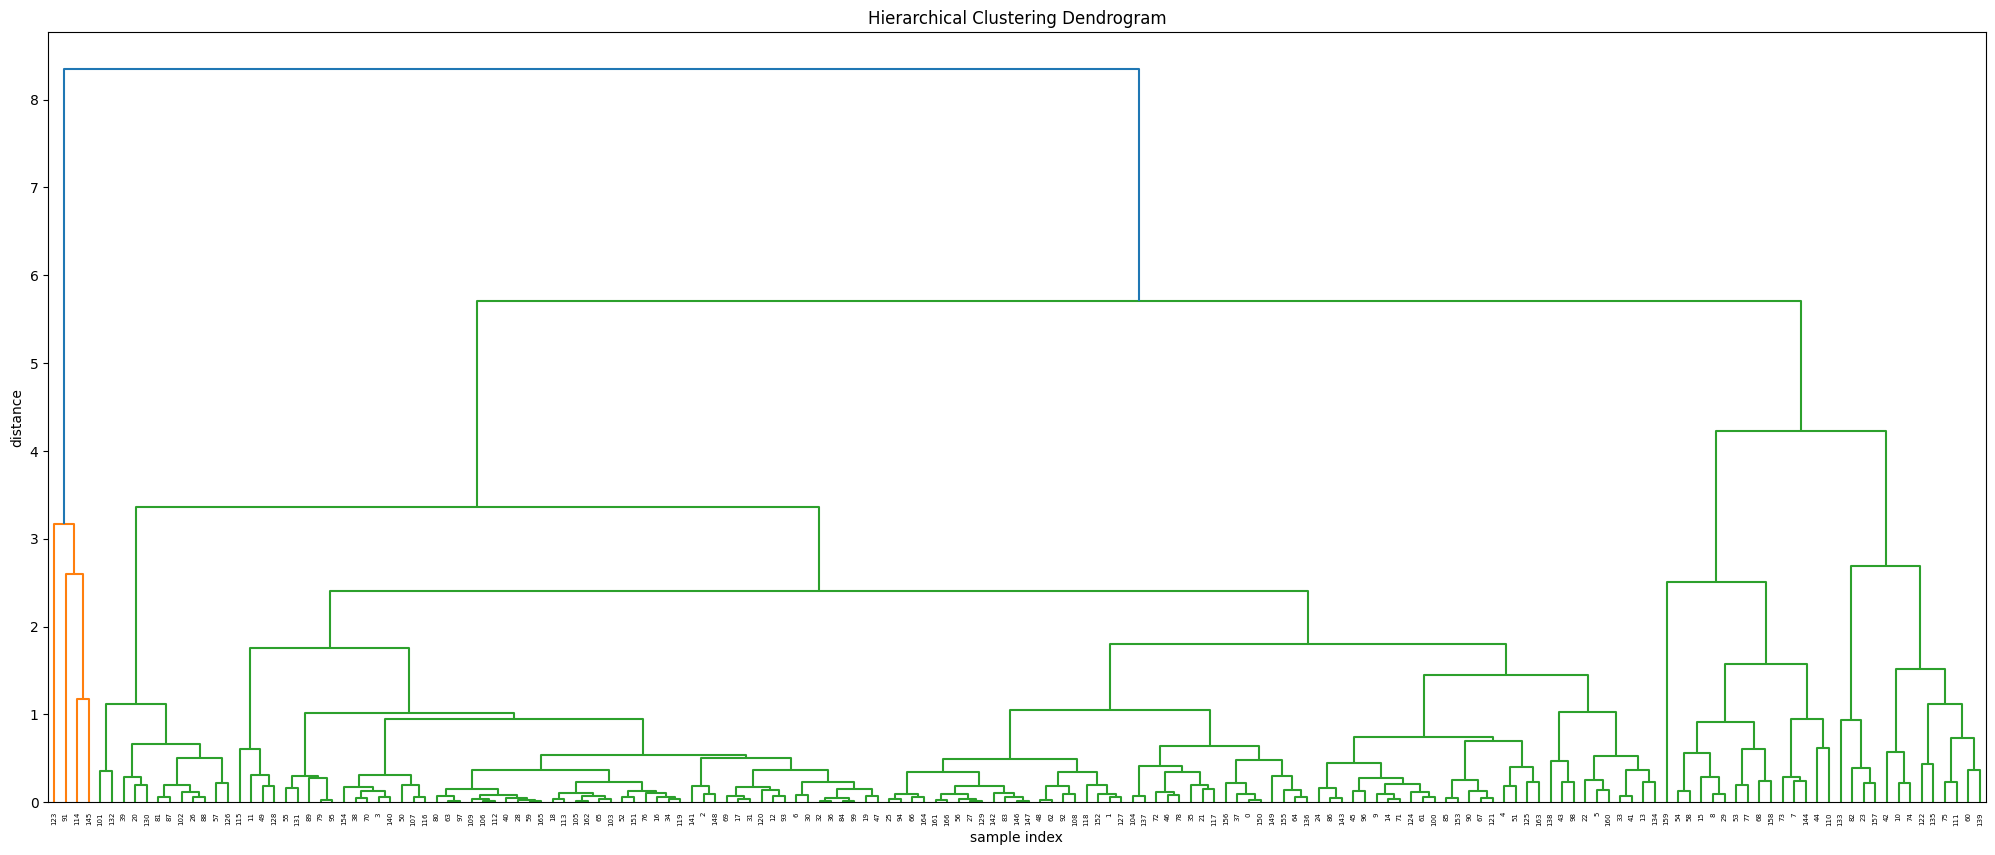

In [63]:
# put your answer here

Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [111.25, 111.25, 150.0, 150.0],
  [72.5, 72.5, 130.625, 130.625],
  [50.0, 50.0, 101.5625, 101.5625],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [205.0, 205.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [217.5, 217.5, 262.5, 262.5],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0, 332.5, 332.5],
  [290.0, 290.0, 321.25, 321.25],
  [355.0, 355.0, 365.0, 365.0],
  [375.0, 375.0,

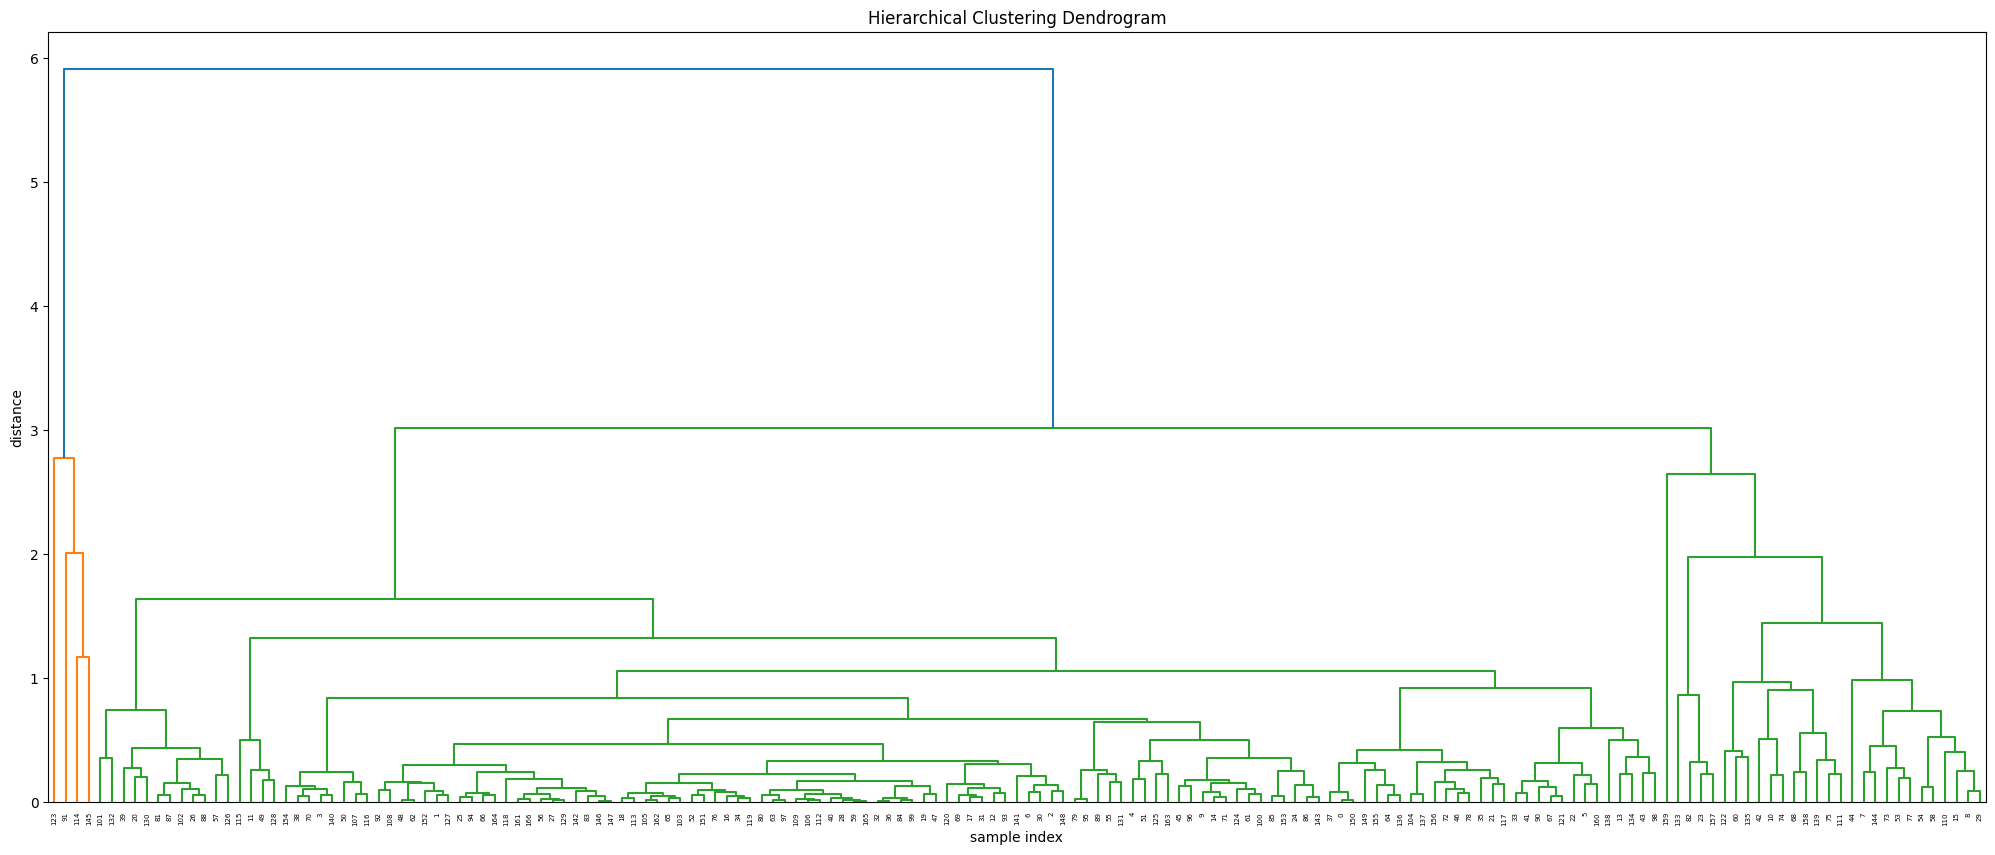

In [64]:
# put your answer here

Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)


Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

5 clusters are the best clusters based on ward dendogram because it balances the quantity of each data point to each of the clusters.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [78]:
# put your answer here

cluster_H = AgglomerativeClustering(n_clusters=5, linkage='ward')
model_clt = cluster_H.fit(X)
model_clt

AgglomerativeClustering(n_clusters=5)

In [79]:

# Predicting Output Class
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))



Output Clusters are
[1 1 1 1 4 4 1 0 0 1 0 4 1 4 1 0 1 1 1 1 3 1 4 0 1 1 3 1 1 0 1 1 1 4 1 1 1
 1 1 3 1 4 0 4 0 1 1 1 1 4 1 4 1 0 0 4 1 3 0 1 0 1 1 1 1 1 1 4 0 1 1 1 1 0
 0 0 1 0 1 4 1 3 0 1 1 4 1 3 3 4 4 2 1 1 1 4 1 1 4 1 1 3 3 1 1 1 1 1 1 1 0
 0 1 1 2 4 1 1 1 1 1 4 0 2 1 4 3 1 4 1 3 4 3 0 4 0 1 1 4 0 1 1 1 1 0 2 1 1
 1 1 1 1 1 4 1 1 1 0 0 0 4 1 1 4 1 1 1]
{np.int64(0): np.int64(28), np.int64(1): np.int64(95), np.int64(2): np.int64(4), np.int64(3): np.int64(12), np.int64(4): np.int64(28)}


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [83]:
import plotly.graph_objects as go

# Select first two features for 2D plotting
x = X.values[:, 0]
y = X.values[:, 1]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=6,
        color=pred1,      # cluster labels determine color
        colorscale='Viridis',
        showscale=True
    )
))

fig.update_layout(
    title='Clusters in 2D',
    xaxis_title='Health',
    yaxis_title='GDPP',
    height=600
)

fig.show()


Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


Hierarchical clustering highlights that global development is characterized by two distinct phases of advancement:

- The Health Foundation: The initial stage (Cluster 0 to 1) shows that small improvements in health are crucial for unlocking early economic growth (GDPP), confirming the necessity of basic human capital investment.

- The Wealth Divergence: Once a high health level is secured (Cluster 2), GDPP becomes highly volatile and detached from health gains, illustrating how advanced economies' wealth is driven by complex factors and capital, not marginal improvements in social welfare.

In essence, the clusters demonstrate that escaping poverty requires a foundation in health, but achieving high-income status depends on entirely different, highly scalable economic drivers.